In [4]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [6]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
PATH = "Dataset1/"


sz=224

In [8]:
torch.cuda.is_available()

False

In [9]:
torch.backends.cudnn.enabled

True

In [10]:
os.listdir(PATH)

['sample', 'valid', 'tmp', 'models', 'train']

In [11]:
os.listdir(f'{PATH}/valid/')

['malignant', 'benign']

In [14]:
files = os.listdir(f'{PATH}/valid/malignant')[:5]
files

['Test25.jpg', 'Test78.jpg', 'Test71.jpg', 'Test76.jpg', 'Test81.jpg']

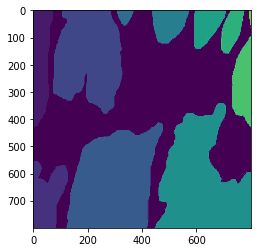

In [16]:
img = plt.imread(f'{PATH}/valid/malignant/{files[0]}')
plt.imshow(img);

In [17]:
img.shape

(800, 800)

In [18]:
img[:4,:4]

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [19]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 50)

100%|██████████| 3/3 [00:15<00:00,  6.03s/it]



epoch      trn_loss   val_loss   accuracy                
    0      1.055691   0.574165   0.74375   
    1      0.84153    0.464284   0.81875         
    2      0.674995   0.502405   0.89375               
    3      0.610227   0.523594   0.875           
    4      0.536084   0.547021   0.8875                  
    5      0.45695    0.558385   0.86875         
    6      0.410658   0.56987    0.8625                  
    7      0.376092   0.564578   0.8625          
    8      0.343328   0.581831   0.85                    
    9      0.311442   0.61736    0.8625                  
    10     0.286989   0.641073   0.8625                  
    11     0.269666   0.642155   0.85                   
    12     0.257264   0.637776   0.85625         
    13     0.23727    0.637177   0.85625         
    14     0.226718   0.659201   0.84375                 
    15     0.215785   0.652502   0.85625                 
    16     0.202657   0.668992   0.8625                  
    17     0.191215 

[0.8000617027282715, 0.84375]

In [20]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['benign', 'malignant']

In [22]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(160, 2)

In [23]:
log_preds[:10]

array([[-17.85905,   0.     ],
       [  0.     , -21.46572],
       [  0.     , -17.51048],
       [ -0.01602,  -4.14161],
       [  0.     , -24.22135],
       [ -0.00001, -11.26743],
       [ -0.00125,  -6.68433],
       [  0.     , -17.89096],
       [ -0.     , -14.88369],
       [  0.     , -17.67888]], dtype=float32)

In [24]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [25]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [26]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [27]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


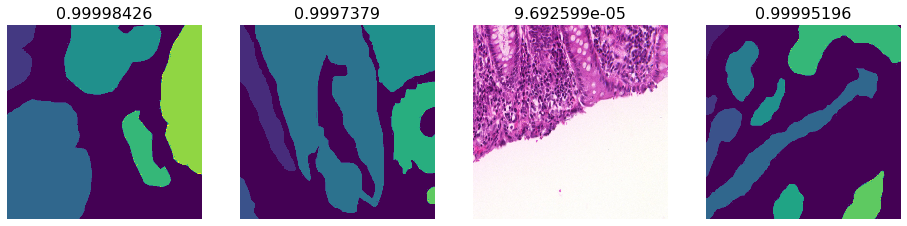

In [28]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


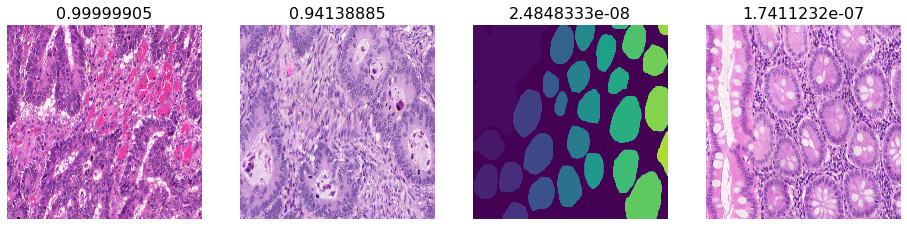

In [29]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(True), "Incorrectly classified")

In [30]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct images


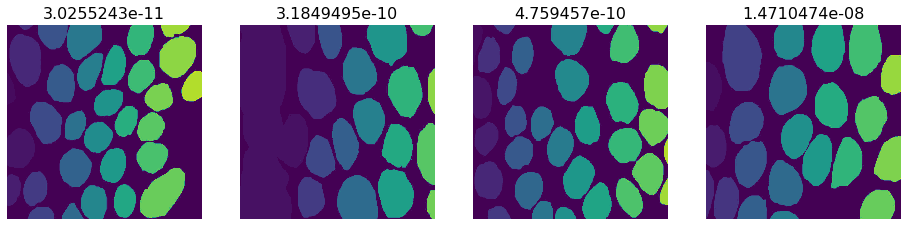

In [31]:
plot_val_with_title(most_by_correct(0, True), "Most correct images")

Most correct 


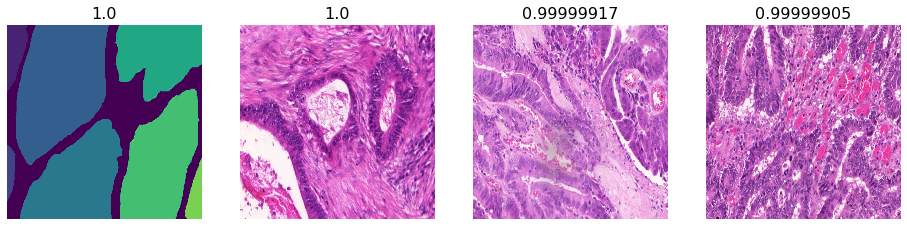

In [32]:
plot_val_with_title(most_by_correct(1, True), "Most correct ")

Most incorrect 


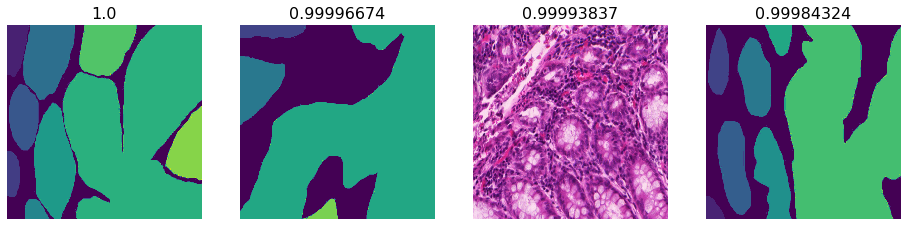

In [33]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect ")

Most incorrect 


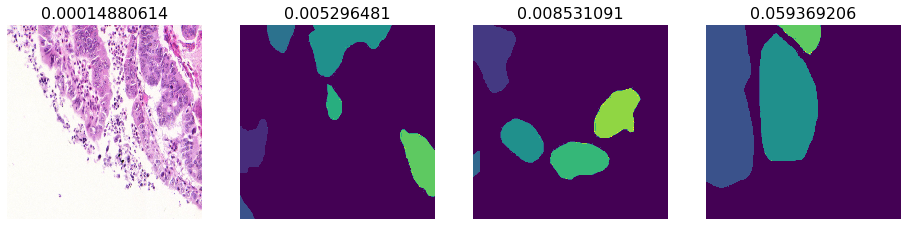

In [34]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect ")

Most uncertain predictions


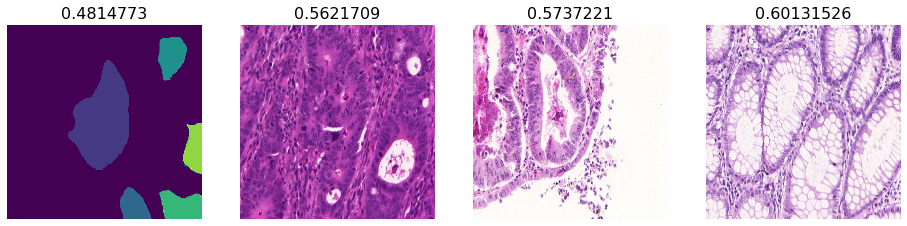

In [35]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")



# Choosing a learning rate

In [36]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [37]:
lrf=learn.lr_find()


epoch      trn_loss   val_loss   accuracy        
    0      1.615149   2.053179   0.54375   


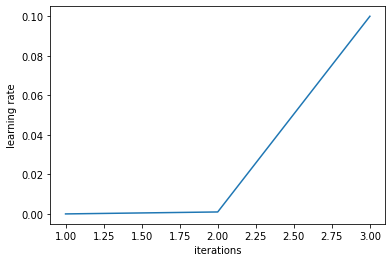

In [38]:
learn.sched.plot_lr()

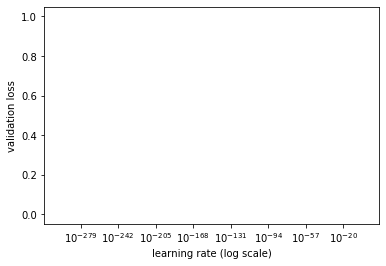

In [39]:
learn.sched.plot()

# Improving our model
Data augmentation

In [40]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [41]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [42]:
ims = np.stack([get_augs() for i in range(6)])

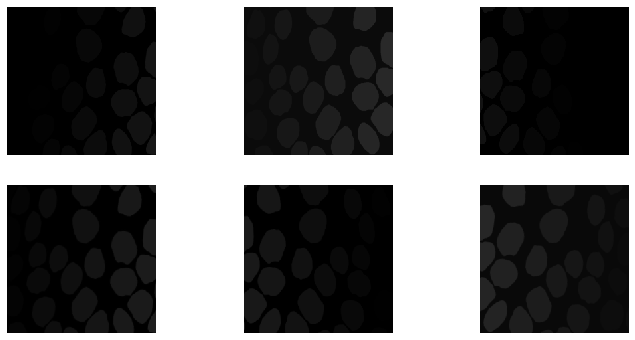

In [43]:
plots(ims, rows=2)

# Let's create a new data object that includes this augmentation in the transforms.



In [44]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [45]:
learn.fit(1e-2, 1)


epoch      trn_loss   val_loss   accuracy               
    0      1.015888   0.523194   0.7625    


[0.5231944441795349, 0.7625]

In [46]:
learn.precompute=False

In [47]:
learn.fit(1e-2, 3, cycle_len=1)


epoch      trn_loss   val_loss   accuracy                
    0      0.636742   0.468186   0.8125    
    1      0.618633   0.395177   0.8375                  
    2      0.56157    0.3625     0.85625                 


[0.36250013709068296, 0.85625]

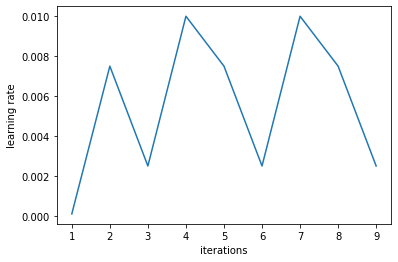

In [48]:
learn.sched.plot_lr()

In [49]:
learn.save('224_lastlayer')

In [50]:




learn.save('224_lastlayer')

In [51]:
learn.load('224_lastlayer')

In [52]:
learn.unfreeze()

In [53]:
lr=np.array([1e-4,1e-3,1e-2])

In [54]:
learn.fit(lr, 3, cycle_len=2, cycle_mult=4)


epoch      trn_loss   val_loss   accuracy                
    0      0.792992   0.466069   0.825     
    1      0.78158    0.539043   0.8125                  
    2      0.704745   0.494403   0.84375                 
    3      0.639391   0.382724   0.8625                  
    4      0.568451   0.373943   0.85625                 
    5      0.506016   0.417892   0.85625                 
    6      0.474673   0.479179   0.84375                 
    7      0.442298   0.498833   0.85                    
    8      0.421233   0.504133   0.85625                 
    9      0.402039   0.501089   0.85                    
    10     0.369392   0.412131   0.8875                  
    11     0.376774   0.445627   0.85                    
    12     0.369901   0.519162   0.84375                 
    13     0.35111    0.688301   0.825                   
    14     0.338449   0.754224   0.8                     
    15     0.328155   0.487677   0.875                   
    16     0.317728   0.396

[0.368068727850914, 0.9]

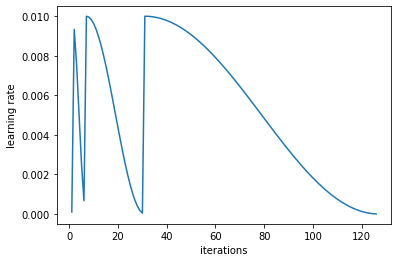

In [55]:
learn.sched.plot_lr()

In [56]:
learn.save('224_all')

In [57]:
learn.load('224_all')

In [58]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [59]:
accuracy_np(probs, y)

0.9


# Analyzing results
Confusion matrix

In [60]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[62 12]
 [ 4 82]]


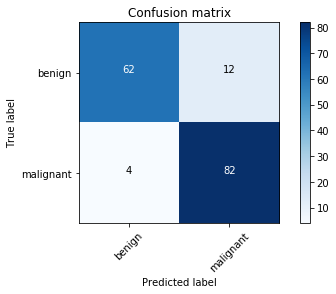

In [62]:
plot_confusion_matrix(cm, data.classes)

# Looking at pictures again

Most incorrect 


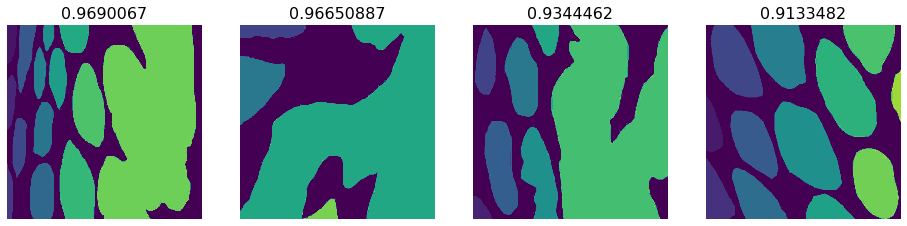

In [63]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect ")

Most incorrect 


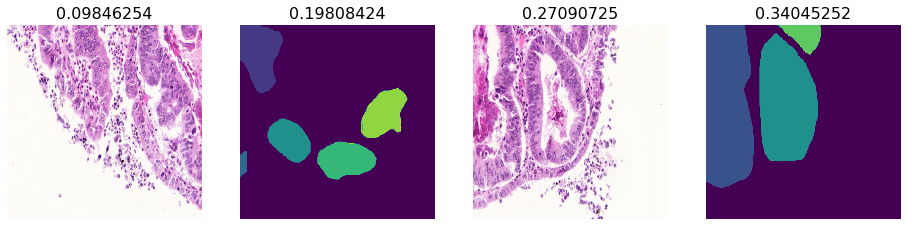

In [64]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect ")